In [1]:
import pandas as pd

In [2]:
d = {
    'miles_per_week': [
        37, 39, 46, 51, 88, 17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33,
        34, 38, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59,
        60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101,
        102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121
    ],
    'completed_50m_ultra': ['no'] * 33 + ['yes'] * 67
}


In [3]:
df = pd.DataFrame(data=d)

In [4]:
df

,miles_per_week,completed_50m_ultra
0,37,no
1,39,no
2,46,no
3,51,no
4,88,no
...,...,...
95,117,yes
96,118,yes
97,119,yes
98,120,yes


In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
finished_race = ['no','yes']

In [7]:
enc = OrdinalEncoder(categories=[finished_race])

In [8]:
df['completed_50m_ultra'] =enc.fit_transform(df[['completed_50m_ultra']])

In [9]:
df

,miles_per_week,completed_50m_ultra
0,37,0.0
1,39,0.0
2,46,0.0
3,51,0.0
4,88,0.0
...,...,...
95,117,1.0
96,118,1.0
97,119,1.0
98,120,1.0


In [10]:
from matplotlib import pyplot as plt

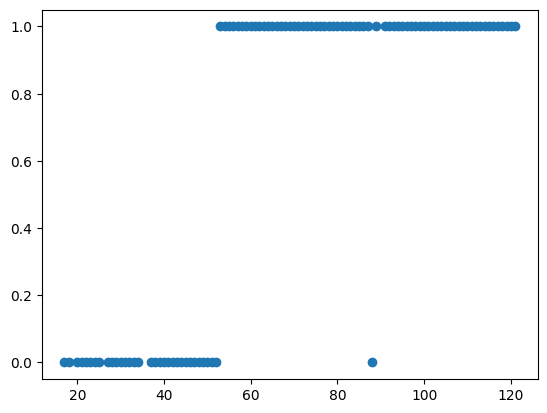

In [11]:
plt.scatter(df.miles_per_week,df.completed_50m_ultra)

In [12]:
import seaborn as sns

<Axes: xlabel='completed_50m_ultra', ylabel='count'>

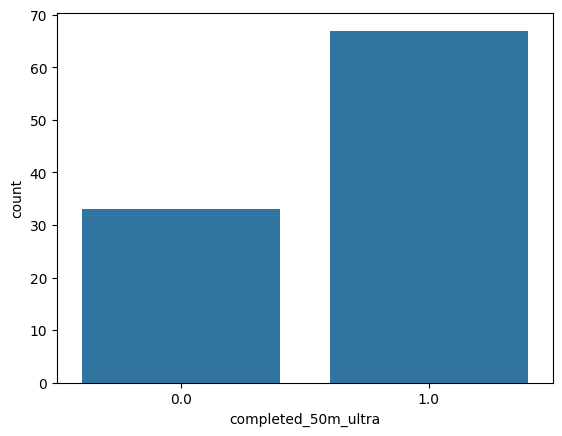

In [13]:
sns.countplot(x= 'completed_50m_ultra',data=df)

In [14]:
x = df.iloc[:,0:1]

In [15]:
y = df.iloc[:,1]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=11)

In [18]:
x_train.shape

(80, 1)

In [19]:
x_test.shape

(20, 1)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()

In [22]:
model.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_prdict = model.predict(x_test)

In [24]:
model.score(x_test,y_test)

1.0

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
print(confusion_matrix(y_test,y_prdict))

[[ 5  0]
 [ 0 15]]


In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test,y_prdict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

